In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data
review_df = pd.read_csv("../sentence_sentiment/review_b_id_0.csv")
# Drop redundant columns
review_df = review_df.drop(['text', 'corrected_text'], axis=1)

review_df['date'] = pd.to_datetime(review_df['date'])

In [3]:
review_df.head()

,business_id,stars,useful,date,review_sentiment
0,Rt4xYQBWC8i2xqLp9dP7XQ,5,0,2016-02-12 14:30:58,"{'forget the others.': 1, 'jim steaks offers t..."
1,Rt4xYQBWC8i2xqLp9dP7XQ,4,1,2016-08-04 14:06:29,"{""this isn't your south street jim which is on..."
2,Rt4xYQBWC8i2xqLp9dP7XQ,1,2,2016-05-08 21:52:24,{'the staff is very rude i asked the guy on th...
3,Rt4xYQBWC8i2xqLp9dP7XQ,5,0,2017-12-30 07:08:52,{'i love the cheese steaks here great place to...
4,Rt4xYQBWC8i2xqLp9dP7XQ,5,0,2012-04-01 23:08:20,{'oh year que cheesy is porno music as your st...


In [4]:
# Convert string type sentiment map to dictionary type and store all keys i.e. Sentiment noun, in one list
def get_sentiment_noun(sentiment_dict):
    sentiment_dict = eval(sentiment_dict)
    return sentiment_dict.keys()

# Convert string type sentiment map to dictionary type and store all values i.e. Sentiment integer, in one list
def get_sentiment_value(sentiment_dict):
    sentiment_dict = eval(sentiment_dict)
    return sentiment_dict.values()

In [5]:
# Split the exploded column into separate 'noun' and 'sentiment' columns
review_df['noun'] = review_df['review_sentiment'].apply(get_sentiment_noun)
review_df['value'] = review_df['review_sentiment'].apply(get_sentiment_value)
# Select relevant columns and explode the 'noun_sentiment' dictionary column
review_df = review_df.explode(['noun', 'value'])
# Dropping extra column
review_df = review_df.drop('review_sentiment', axis=1)

In [6]:
# remove rows with numbers
def remove_rows_with_numbers(df, column_name):
    pattern = r'\d+'
    mask = df[column_name].str.contains(pattern)
    return df[~mask]

# review_df = remove_rows_with_numbers(review_df, 'noun')

In [7]:
# Extracting year, month, day and hour from datetime column
review_df['year'] = review_df['date'].dt.year
review_df['month'] = review_df['date'].dt.month
review_df['day'] = review_df['date'].dt.day
review_df['hour'] = review_df['date'].dt.hour

In [8]:
review_df.shape, review_df.head()

((707, 10),
               business_id  stars  useful                date  \
 0  Rt4xYQBWC8i2xqLp9dP7XQ      5       0 2016-02-12 14:30:58   
 0  Rt4xYQBWC8i2xqLp9dP7XQ      5       0 2016-02-12 14:30:58   
 0  Rt4xYQBWC8i2xqLp9dP7XQ      5       0 2016-02-12 14:30:58   
 0  Rt4xYQBWC8i2xqLp9dP7XQ      5       0 2016-02-12 14:30:58   
 0  Rt4xYQBWC8i2xqLp9dP7XQ      5       0 2016-02-12 14:30:58   
 
                                                 noun value  year  month  day  \
 0                                 forget the others.     1  2016      2   12   
 0  jim steaks offers the best cheese steak in phi...     2  2016      2   12   
 0     i like mine with provolone or american cheese.     2  2016      2   12   
 0  while in the tampa fly area a few years ago i ...     1  2016      2   12   
 0  i found out that the owner was the cousin of t...     1  2016      2   12   
 
    hour  
 0    14  
 0    14  
 0    14  
 0    14  
 0    14  )

### Patterns
1. Hour of day
2. Day of week
3. Last day of Month
4. First day of Month
5. Day of month
6. Month of year
7. Quarter of review
8. Week of year
9. Public holidays
10. Time since business opening

- Perform review analysis for the above patterns.
- Perform day wise analysis.

1. Capture correlation between sentiment about attributes and business rating.
   1. Day 1 - food (2) service (1) rating 4.5.
   2. Day 2 - food(2) service(0) rating 4.
2. Find attributes that are the lowest rated.
3. Correlation between Food eaten and Customer rating.
4. Correlate review rating with time of day.
   1. if reviews are good in the evenings but bad in the morning, then try to tie it to one contributing factor.
   2. Statistical test to compare 2 numbers is required.


# To do (reviews do not contain user_id)
1. If a review has many upvotes. Give special attention to that user/review.
   1. May use the user as a promoter if they like the restaurant.
   2. If upvoted review is negative, then use that to learn about mistakes.

In [9]:
xclud_review_df = review_df[['business_id', 'stars', 'useful', 'date', 'year', 'month', 'day', 'hour']].drop_duplicates()

In [10]:
# Average star rating per operational day.
avg_star_per_operational_day = xclud_review_df.groupby(xclud_review_df['date'].dt.date)['stars'].aggregate('mean').reset_index()

In [11]:
import seaborn as sns

Better to plot this chart on a calender. Drill downable, Starting with average rating (per year) -> avg rating (per month) -> avg rating (per day)

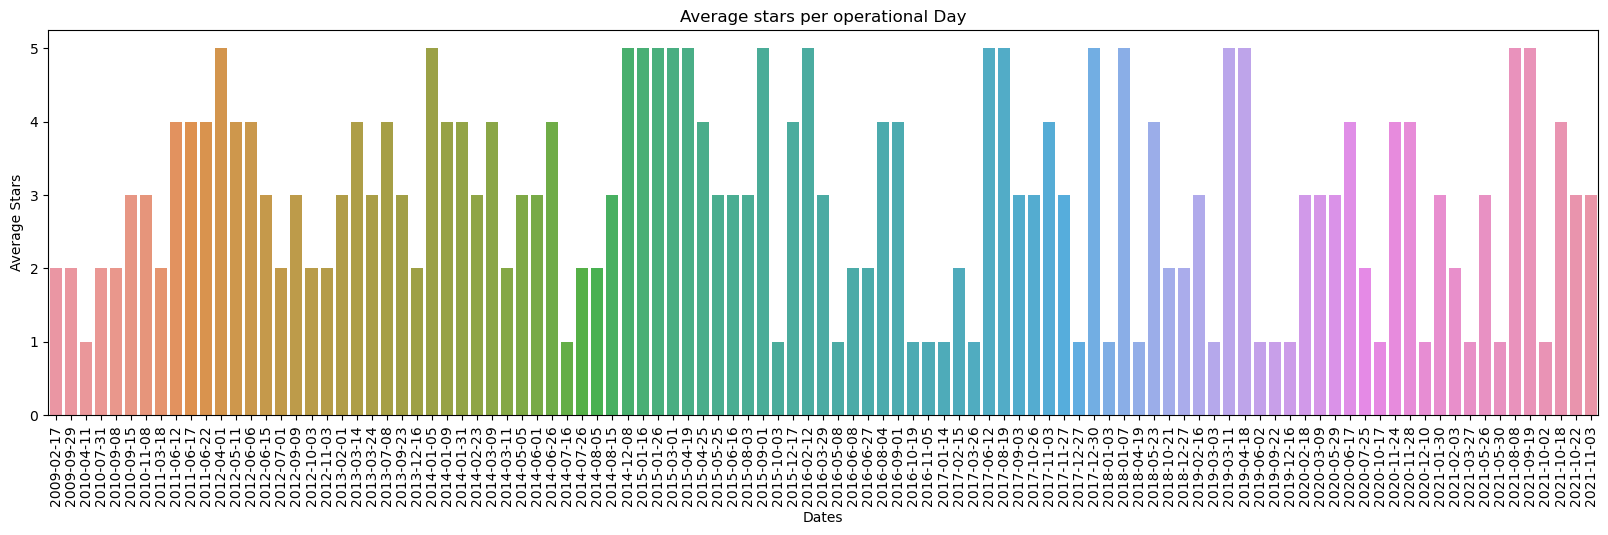

In [12]:
plt.figure(figsize=(20, 5))
sns.barplot(data=avg_star_per_operational_day, x='date', y='stars')
plt.xlabel('Dates')
plt.ylabel('Average Stars')
plt.xticks(rotation=90)
plt.title('Average stars per operational Day')
plt.show()

In [13]:
# Pattern's of analysis
pattern_of_analysis = ['hour_of_day', 'day_of_week', 'last_day_of_month', 
                       'first_day_of_month', 'day_of_month', 'month_of_year', 
                       'quarter_of_year', 'week_of_year', 'public_holidays']

# def hour_of_day():
    

## Visualization functionality

1. input: filters (business_id, year_selection, month_selection, day_selection), dataframe.
2. output: required visualization / appropriate dataframe.
3. functionality: 
   1. each filter parameter should be optional.
   2. if year_selection is not present, then show "mean rating per year"
   3. if only year_selection is present, then show "mean rating per month for that year".
   4. if year_selection and month_selection are present, then show "mean rating per day for that year and month".
   5. if year_selection, month_selection and day_selection are provided then show "mean rating per hour of day".
   6. Any combination of these 3 filters should work without errors.
   7. Make necessary changes to textual information w.r.t to the input filter changes. 

In [14]:
def dataframe_filter(df, **kwargs):
    """ 
    column: may have 1 or more columns to filter the dataframe
    filter_param: may have 1 or more corresponding points to filter by
    permitted kwargs: "columns", "filter_param". 
    """
    query = []
    for key, val in kwargs.items():
        query.append(f'{key} == {val}')

    # create sql like query for filtering dataframe
    query = " & ".join(query)

    return df.query(query)

def generate_viz(df, **kwargs):
    """ 
    inputs:
        df: dataframe for which to plot the visualization.
        variable parameters: other strings required for plot "title", "label" etc 
    permitted var args: "year", "month", "day"
    """
    time_span = "Complete"
    year = 'Lifetime'
    columns = df.columns
    
    # parse the variable arguments dict for plot title
    if kwargs['year']:
        year = kwargs["year"]
        # print("Year selected", year)
        time_span = "year"
    
    elif kwargs['month']:
        month_selected = kwargs['month']
        time_span = "month"
    
    elif kwargs['day']:
        day_selected = kwargs['day']
        time_span = "day"

    plt.figure(figsize=(20, 5))
    sns.barplot(data=df, x=columns[0], y='stars')
    plt.xlabel(f'{columns[0]}')
    plt.ylabel('Average Stars')
    plt.xticks(rotation=90)
    plt.gca().set_ylim(1, 5)
    plt.title(f'Average stars per {columns[0].capitalize()} for the {time_span} - {year}')
    plt.grid()
    plt.show()

    
def create_aggregated_tables(df, business_id=None, year_selection=None, month_selection=None, day_selection=None, manual_selection=None):
    """
    1. Year, month, day are the proxy for a mouse click.
    2. At first, average restaurant ratings per year are displayed. The use then clicks on an year, 
        the year_selection parameter captures the year on which mouse click happened.
    3. Then the average ratings per month are displayed. The user then can click on any month, month_selection parameter captures that month.
        and average ratings per day are displayed.
    4. so on and so forth

    """
    """
    business_id: business_id for which to generate the visualization.
    year_selection: "Year" filter for which you want visualization to be generated.
    month_selection: "Month" filter for which you want visualization to be generated.
    day_selection: "Day" filter for which you want visualization to be generated.
    manual_selection: a set of patterns of analysis, defined in "pattern_of_analysis". Each 
        pattern in this can be implemented at each level of filtering i.e. year_selection, month_selection and day_selection.
        IMPLEMENT IT LATER.
    """
    
    if year_selection == month_selection == day_selection == manual_selection == None:
        # Default behavior to give average rating per year.
        # todo - give option (these apply to the whole lifetime of the restaurant)
        # 1. to generate avg rating per month (normalize the avg w.r.t number of days in a month, some months have 31 days, some have 30, feb has 28 days).
        # 2. to generate avg rating per day of week.
        # 3. to generate avg rating per hour of day.

        # Average rating of restaurant per year
        avg_star_rating = df.groupby(df['date'].dt.year)['stars'].aggregate('mean').reset_index()

    
    # if there is only year selection, then show avg restaurant rating per month for that year.
     
    elif month_selection == day_selection == None and year_selection is not None:
        df = dataframe_filter(df, year=year_selection)
        avg_star_rating = df.groupby(df['month'])['stars'].aggregate('mean').reset_index()
        
        # Number of months in a year
        months = np.arange(1, 13, 1)
        
        # Some months may not have any review. The plot must still show all the months on the x-axis. 
        for m in months: 
            if m not in avg_star_rating['month'].to_list():
                # print("months missing", m)
                # filling in the zero star rating for missing months.
                avg_star_rating.loc[len(avg_star_rating)] = [m, 0]
    
    # year and month selection - avg restaurant rating per day of month.
    elif year_selection is not None and month_selection is not None and day_selection is None:
        df = dataframe_filter(df, year=year_selection, month=month_selection)
        avg_star_rating = df.groupby(df['day'])['stars'].aggregate('mean').reset_index()

        # Number of days in a month
        days = np.arange(1, 32, 1)

        # Some months may not have any review. The plot must still show all the months on the x-axis. 
        for d in days: 
            if d not in avg_star_rating['day'].to_list():
                avg_star_rating.loc[len(avg_star_rating)] = [d, 0]
                
    # if year, month and day filters are provided, provide average star rating per hour for the filtered data.
    else:
        df = dataframe_filter(df, year=year_selection, month=month_selection, day=day_selection)
        avg_star_rating = df.groupby(df['hour'])['stars'].aggregate('mean').reset_index()

        # Number of hours in a day
        hours = np.arange(0, 24, 1)

        # Some hours may not have any review. The plot must still show all the hours on the x-axis. 
        for h in hours: 
            if h not in avg_star_rating['hour'].to_list():
                avg_star_rating.loc[len(avg_star_rating)] = [h, 0]

    generate_viz(avg_star_rating, year=year_selection, month=None, day=None)
    # return avg_star_rating


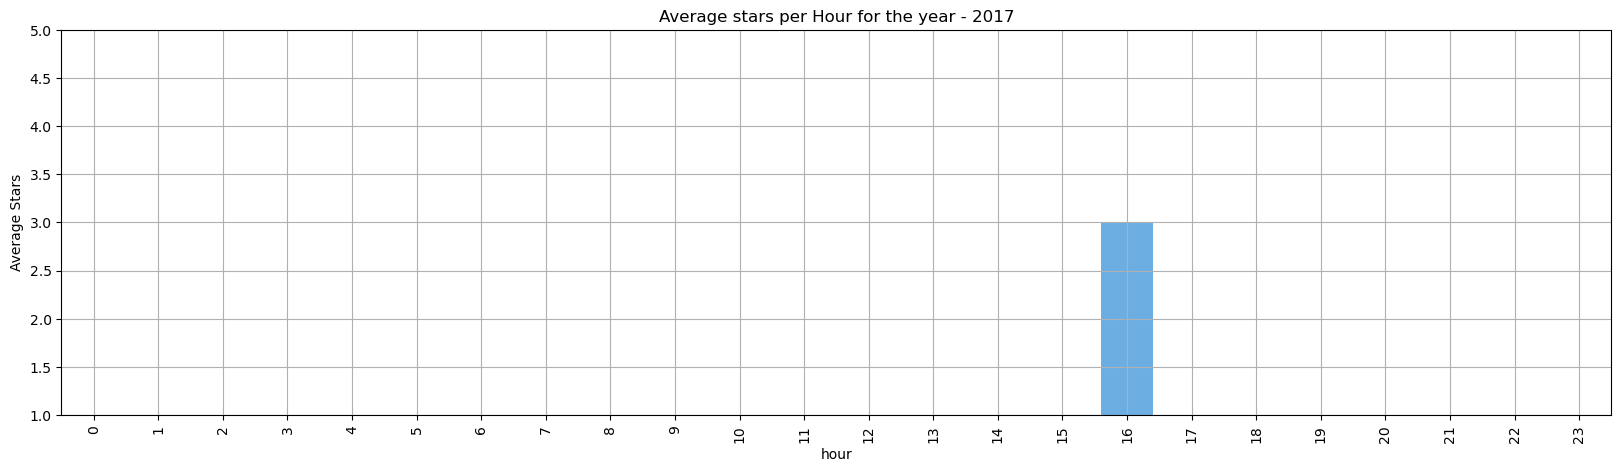

In [15]:
temp_df = create_aggregated_tables(xclud_review_df, year_selection=2017, month_selection=9, day_selection=3)

1. Capture correlation between sentiment about attributes and business rating.
   1. First bucket the attributes.
   2. This can be achieved using Clustering.
2. Create clusters of all the attributes. Number of clusters is unknown, so go very high. Silhouette curve may come in handy.
3. Label the clusters, and combine the sentiment with the cluster labels. 
4. Proceed with calculating correlation between an attribute and a business rating.

# Clustering

In [15]:
from collections import Counter

In [16]:
count = Counter()
for text in review_df['noun'].values:
    for word in text.split():
        count[word]+=1

frequent_words = pd.DataFrame(count.most_common(50))
frequent_words.columns=['word','count']
# frequent_words.head()

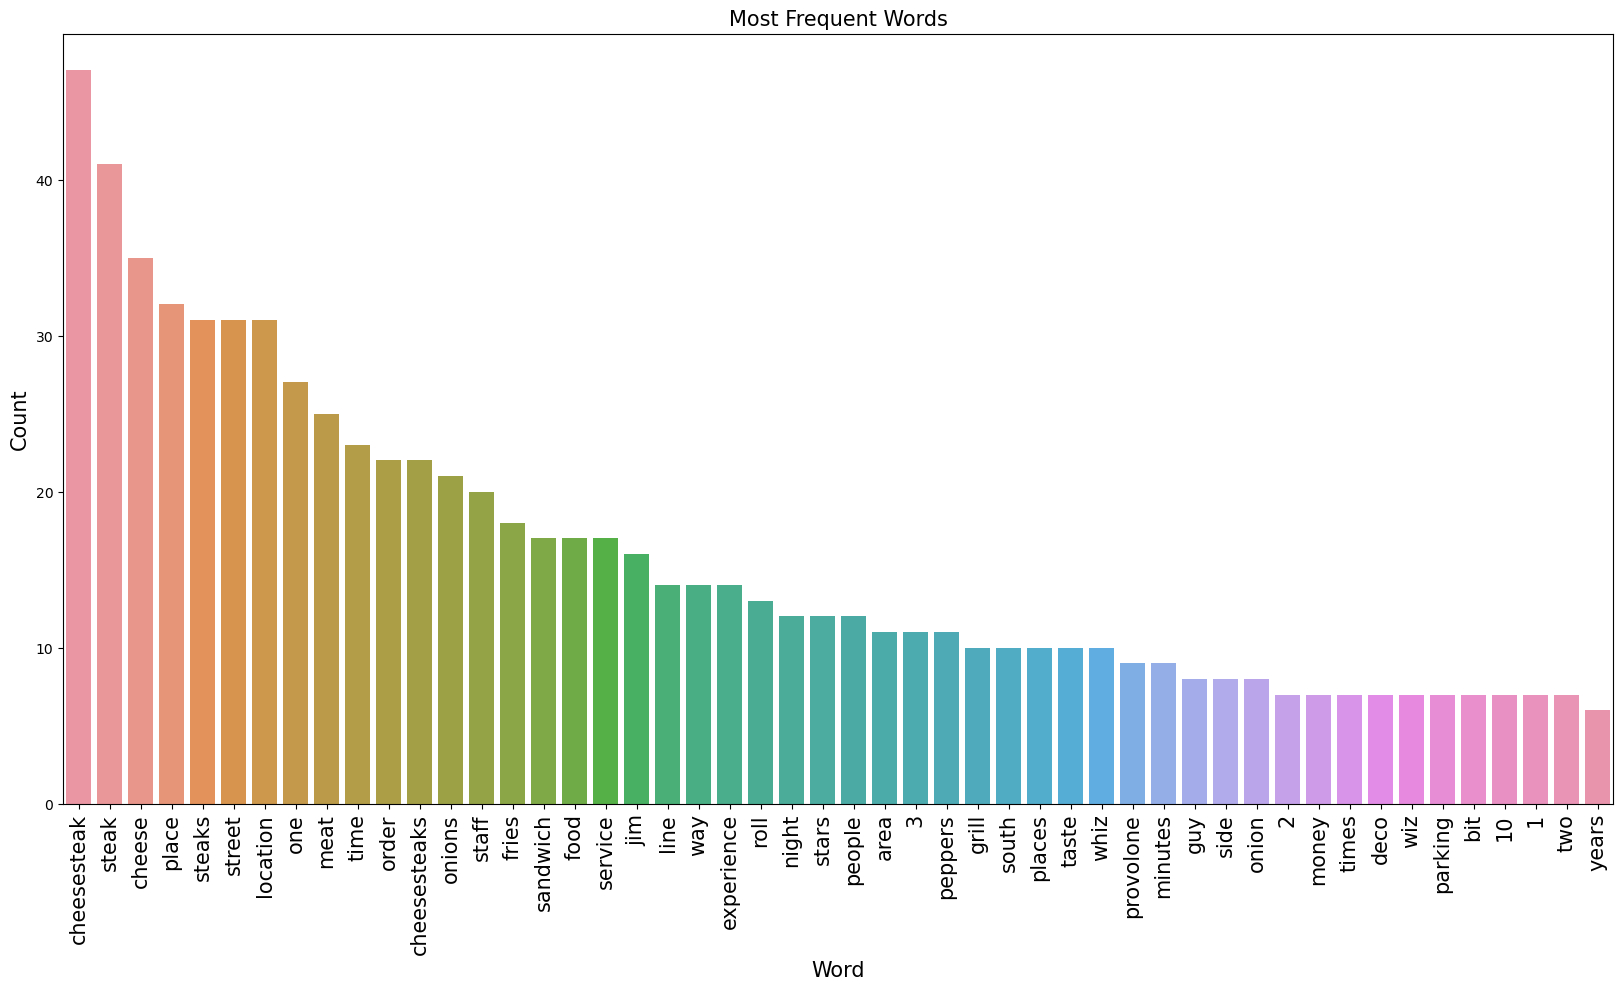

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(x=frequent_words['word'],y=frequent_words['count'])
plt.title("Most Frequent Words", fontsize = 15)
plt.xlabel('Word', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation=90, fontsize = 15)
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

Arriving at optimum 'eps' value

In [17]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(review_df['noun'])

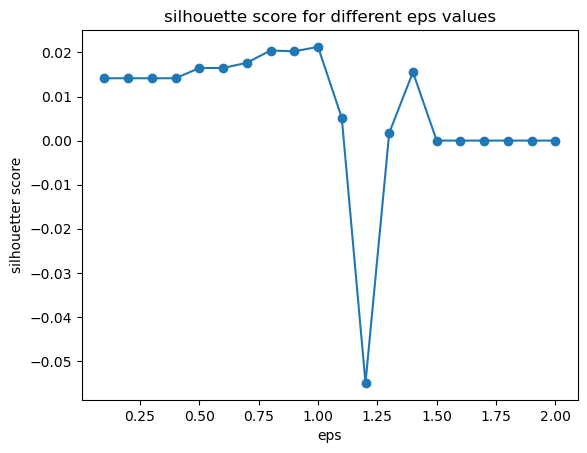

optimum eps value:  0.9999999999999999


In [18]:
from sklearn.metrics import silhouette_score

eps_values = np.linspace(0.1, 2.0, num=20)
silhouette_scores = []

for eps in eps_values:
    clustering = DBSCAN(eps=eps, min_samples=1).fit(X_tfidf)
    labels = clustering.labels_
    if len(set(labels)) > 1:
        score = silhouette_score(X_tfidf, labels)
    else:
        score = 0
    silhouette_scores.append(score)

plt.plot(eps_values, silhouette_scores, marker='o')
plt.xlabel('eps')
plt.ylabel('silhouetter score')
plt.title('silhouette score for different eps values')
plt.show()

optimum_eps = eps_values[np.argmax(silhouette_scores)]
print("optimum eps value: ", optimum_eps)

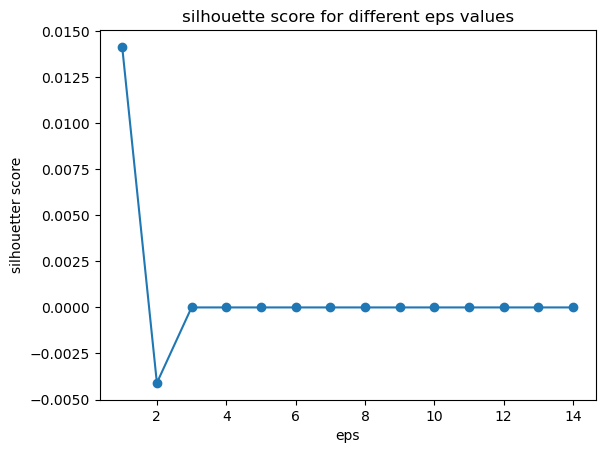

optimum eps value:  1


In [19]:
min_sample_values = np.arange(1, 15)
silhouette_scores = []

for ms in min_sample_values:
    clustering = DBSCAN(eps=0.1, min_samples=ms).fit(X_tfidf)
    labels = clustering.labels_
    if len(set(labels)) > 1:
        score = silhouette_score(X_tfidf, labels)
    else:
        score = 0
    silhouette_scores.append(score)

plt.plot(min_sample_values, silhouette_scores, marker='o')
plt.xlabel('eps')
plt.ylabel('silhouetter score')
plt.title('silhouette score for different eps values')
plt.show()

optimum_ms = min_sample_values[np.argmax(silhouette_scores)]
print("optimum eps value: ", optimum_ms)

In [20]:
clustering = DBSCAN(eps=1, min_samples=1).fit(X_tfidf)
DBSCAN_dataset = X_tfidf.copy()
DBSCAN_dataset_dense = DBSCAN_dataset.toarray()
# DBSCAN_dataset_dense.loc[:,'Cluster'] = clustering.labels_ 
review_df['cluster'] = clustering.labels_

# DBSCAN is useless here. It is not doing any meaningful clustering. 
## Cluster labels are the same as the value_counts on the 'noun' column.

In [21]:
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


C:\Users\blahb\anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassific

In [22]:
corpus = review_df['noun'].to_list()
# Tokenize and encode words
encoded_input = tokenizer(corpus, padding=True, truncation=True, return_tensors='pt')

# Obtain token IDs and attention mask
input_ids = encoded_input['input_ids']
attention_mask = encoded_input['attention_mask']


In [23]:
import torch


In [24]:
# Generate BERT embeddings
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    embeddings = outputs.last_hidden_state[:, 0, :]


In [25]:
from sklearn.decomposition import PCA


In [26]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Set the desired number of components
embeddings_reduced = pca.fit_transform(embeddings)


In [27]:
import os
os.environ["OMP_NUM_THREADS"] = '7'
import warnings
warnings.filterwarnings("ignore")

### Plot silhouette scores to get optimum number of clusters 

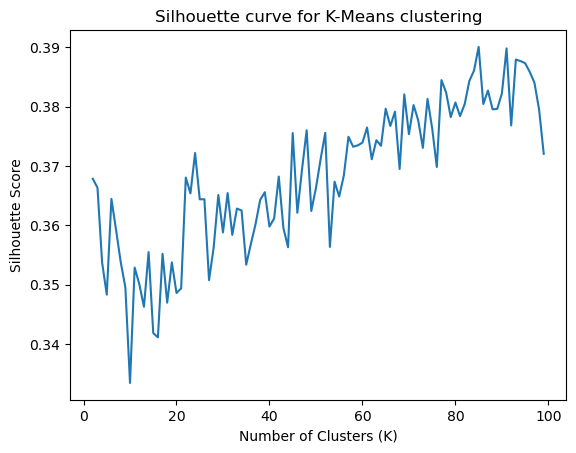

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = np.arange(start=2, stop=100, step=1)

silhouette_scores = []

for k in k_values:
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(embeddings_reduced)
  scores = silhouette_score(embeddings_reduced, labels)
  silhouette_scores.append(scores)


plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette curve for K-Means clustering')
plt.show()


### Plotting Elbow curve to obtain optimum cluster values

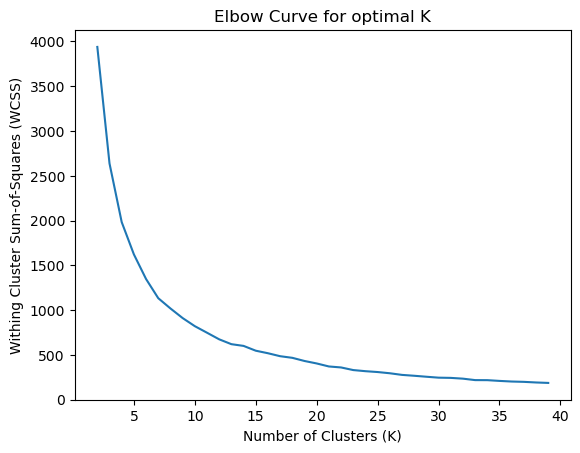

In [29]:
k_values = np.arange(2, 40)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(embeddings_reduced)
    wcss.append(kmeans.inertia_)


plt.plot(k_values, wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Withing Cluster Sum-of-Squares (WCSS)')
plt.title('Elbow Curve for optimal K')
plt.show()

Optimum number of clusters seems to be 15.

Text(0.5, 1.0, 'silhouette curve for cluster numbers')

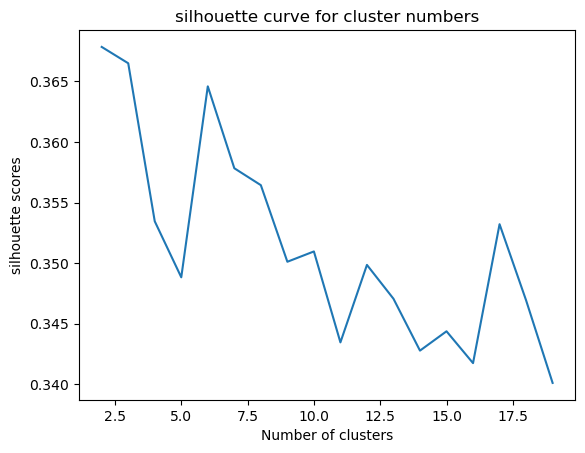

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = np.arange(2, 20)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(embeddings_reduced)
    score = silhouette_score(embeddings_reduced, labels)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette scores')
plt.title('silhouette curve for cluster numbers')

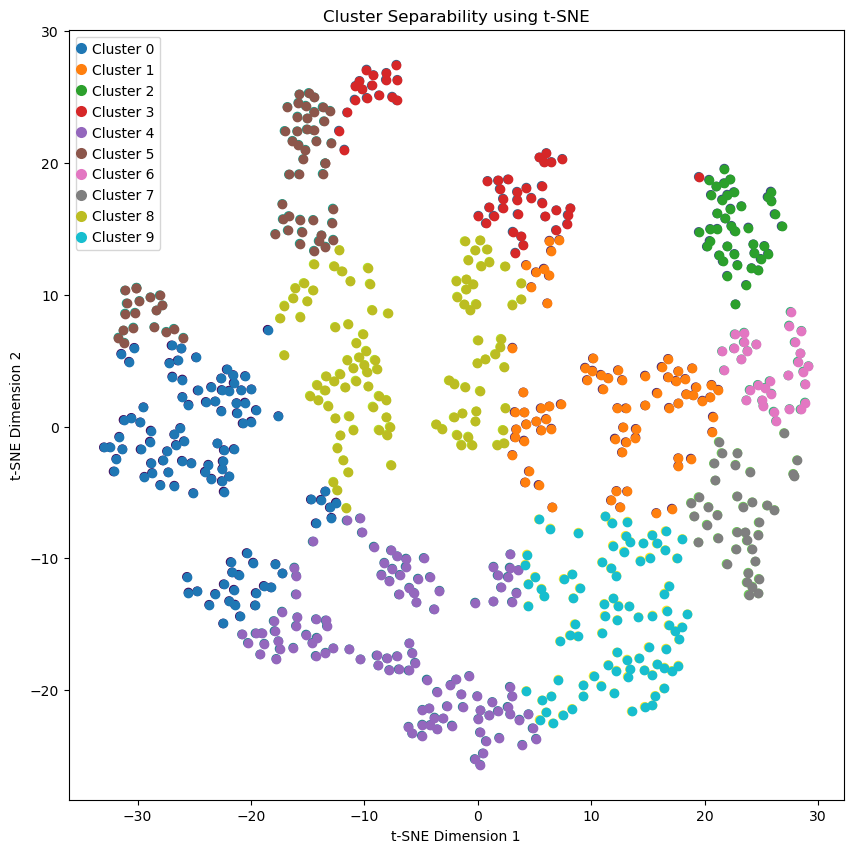

In [31]:
from sklearn.manifold import TSNE
import random

kmeans = KMeans(n_clusters = 10)
labels = kmeans.fit_predict(embeddings_reduced)

# Generate a color palette
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Shuffle the color palette randomly
# random.shuffle(color_palette)

tsne = TSNE(n_components=2, random_state=23)
embeddings_2d = tsne.fit_transform(embeddings_reduced)

# Plot cluster separability in 2D
plt.figure(figsize=(10, 10))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Cluster Separability using t-SNE')

# Get the unique cluster labels
unique_labels = set(labels)

# Plot cluster separability in 2D
for label in range(10):
    indices = labels == label
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], c=color_palette[label], label=f'Cluster {label}')

# Create legend elements dynamically based on the number of clusters
legend_elements = []
for label in unique_labels:
    legend_elements.append(plt.Line2D([0], [0], marker='o', markeredgecolor='none', color=color_palette[label], label=f'Cluster {label}',
                                      markerfacecolor=color_palette[label], markersize=8))


# Add legend
plt.legend(handles=legend_elements, handlelength=0)

plt.show()

10 clusters has a good separation. 

In [32]:
review_df['cluster'] = labels 

In [33]:
review_df['cluster'].value_counts()

4    113
8    103
0    102
9     88
1     76
5     62
3     51
2     41
7     39
6     32
Name: cluster, dtype: int64

# Unsupervised learning updates
1. The clustering

1. Day 1 - food (2) service (1) rating 4.5.
   2. Day 2 - food(2) service(0) rating 4.
2. Find attributes that are the lowest rated.
3. Correlation between Food eaten and Customer rating.
4. Correlate review rating with time of day.
   1. if reviews are good in the evenings but bad in the morning, then try to tie it to one contributing factor.
   2. Statistical test to compare 2 numbers is required.